⏳ Extracting Financial Metrics...


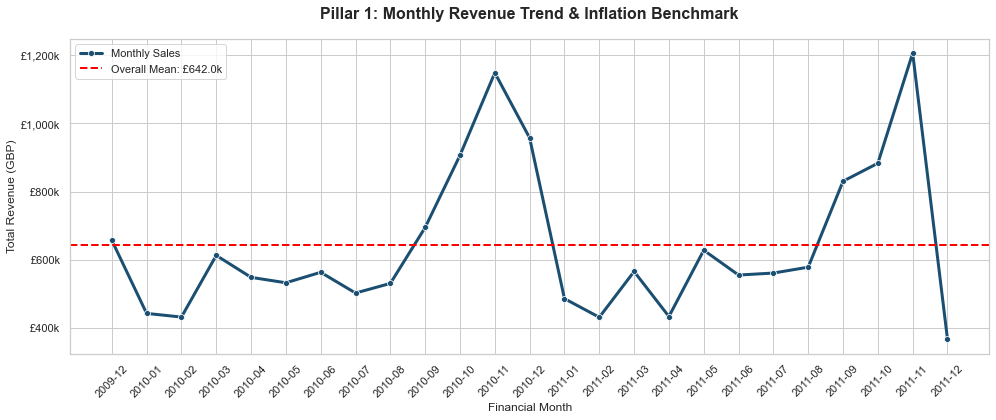


📊 --- Executive Sales Summary (YoY vs Inflation) ---


,Period,TotalSales,YoY_Growth,UK_Inflation_Rate
0,Year 2009-2010,"£7,897,212.60",-,-
1,Year 2010-2011,"£8,152,823.36",3.24%,4.50%



⚠️ WARNING: Revenue growth (3.24%) is below inflation (4.5%). Real value is decreasing.
⏳ Analyzing Product Performance and Inventory Turnover...


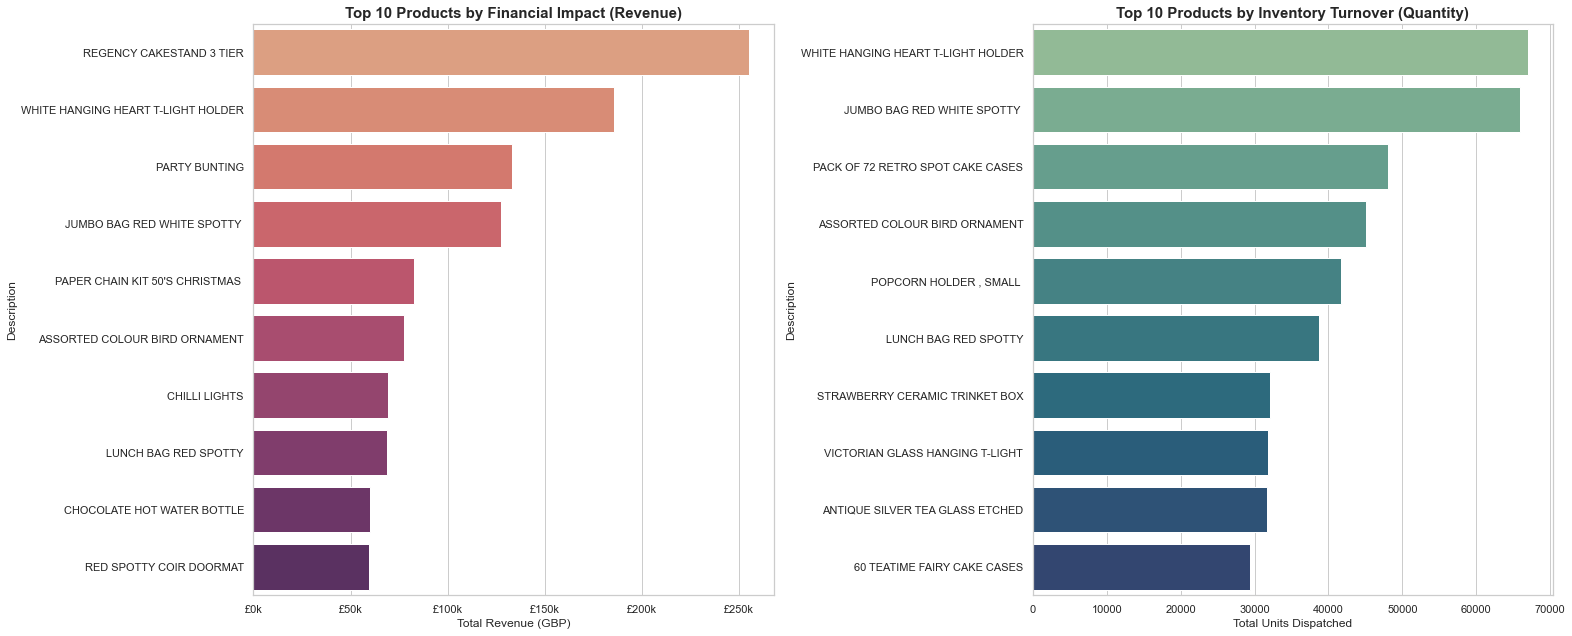

⏳ Fetching unified product metrics for Strategic Matrix...


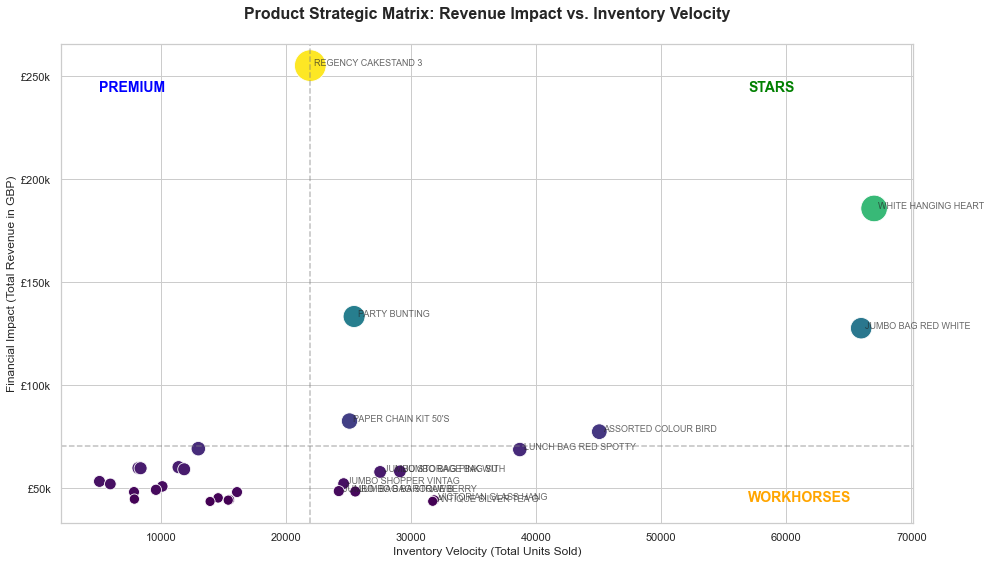

⏳ Performing Geographical Expansion Analysis...

--- 👤 Customer Persona & Behavior Metrics ---
Average Revenue per Customer: £2,384.26
Order Frequency per Customer: 6.17 orders


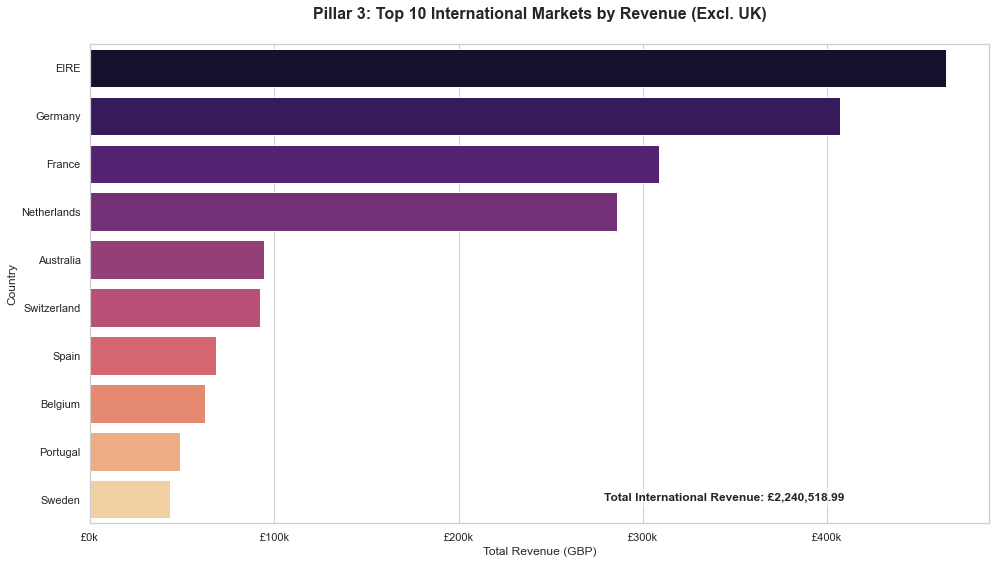

⏳ Calculating Logistics Efficiency and Cancellation Impact...

📦 --- Logistics & Operational Indicators ---
Average Cargo Size per Order: 204.57 units
Total Cancelled Invoices: 8,292
Potential Revenue Loss: £1,527,415.00


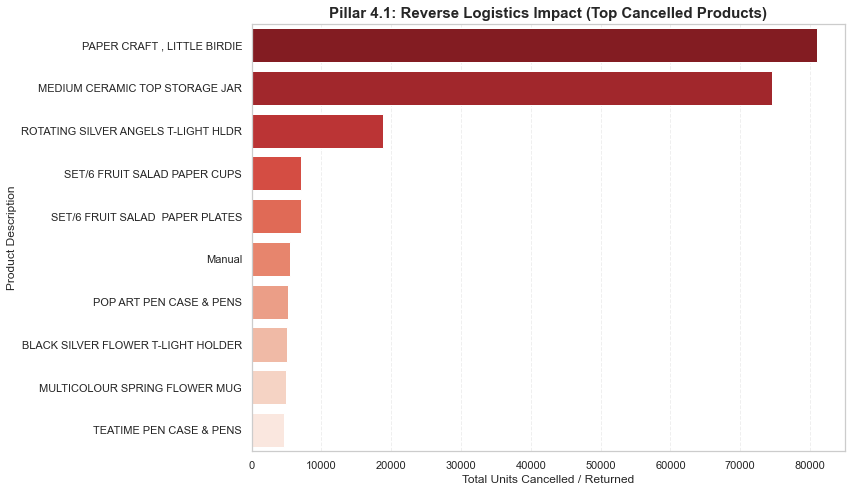

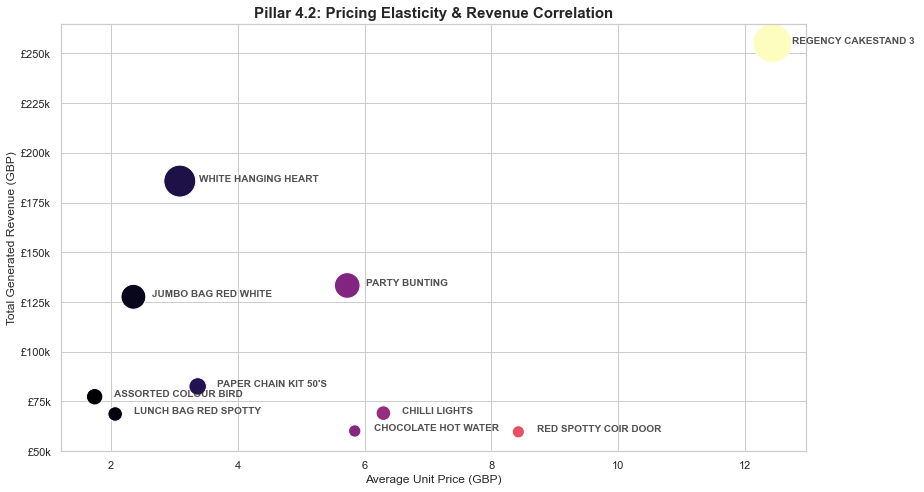


✅ Analysis Complete. Strategic pillars and operational risks identified.


In [4]:
# === IMPORTS ===
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sys
import os

# === CONFIGURATION ===
# Suppress scientific notation and set professional formatting
pd.options.display.float_format = '{:,.2f} GBP'.format
sns.set_theme(style="whitegrid")

# Project Path Setup
PROJECT_ROOT = os.path.abspath(os.path.join('..'))
sys.path.append(PROJECT_ROOT)

# Import Business Logic from KPI Engine
from src.kpi_engine import (
    get_sales_per_year, 
    get_sales_per_month,
    get_top_products_by_revenue, 
    get_top_products_by_quantity,
    get_product_matrix_data, 
    get_geo_analysis, 
    get_customer_behavior_metrics,
    get_logistics_units_per_order, 
    get_top_products_pricing_analysis,
    get_cancellation_summary_metrics,  # New
    get_top_cancelled_products        # New
)

# === SECTION 1: SALES TRENDS & GROWTH ANALYSIS ===
print("⏳ Extracting Financial Metrics...")
df_yearly = get_sales_per_year()
df_monthly = get_sales_per_month()

# 1.1 Calculate Year-over-Year (YoY) Growth & Inflation
df_yearly['YoY_Growth'] = df_yearly['TotalSales'].pct_change() * 100
# Historical UK Inflation Rate reference (2011)
df_yearly['UK_Inflation_Rate'] = [None, 4.50] 

# 1.2 Data Visualization: Monthly Revenue Stream
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=df_monthly, 
    x='Month', 
    y='MonthlySales', 
    marker='o', 
    color='#1B4F72', 
    linewidth=3,
    label='Monthly Sales'
)

# Reference Line: Historical Monthly Mean
monthly_mean = df_monthly['MonthlySales'].mean()
plt.axhline(monthly_mean, color='red', linestyle='--', linewidth=2, label=f'Overall Mean: £{monthly_mean*1e-3:,.1f}k')

plt.title('Pillar 1: Monthly Revenue Trend & Inflation Benchmark', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Financial Month', fontsize=12)
plt.ylabel('Total Revenue (GBP)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-3:,.0f}k'))
plt.legend(frameon=True, loc='upper left')
plt.tight_layout()
plt.show()

# 1.3 Executive Summary Table
print("\n📊 --- Executive Sales Summary (YoY vs Inflation) ---")
formatted_yearly = df_yearly.style.format({
    "TotalSales": "£{:,.2f}",
    "YoY_Growth": "{:.2f}%",
    "UK_Inflation_Rate": "{:.2f}%"
}, na_rep="-")

display(formatted_yearly)

# 1.4 Real Growth Verification
growth = df_yearly['YoY_Growth'].iloc[-1]
inflation = df_yearly['UK_Inflation_Rate'].iloc[-1]

if growth > inflation:
    print(f"\n✅ SUCCESS: The business grew by {growth:.2f}%, outpacing the {inflation}% inflation rate.")
else:
    print(f"\n⚠️ WARNING: Revenue growth ({growth:.2f}%) is below inflation ({inflation}%). Real value is decreasing.")


# === SECTION 2: PRODUCT PERFORMANCE & INVENTORY TURNOVER ===
print("⏳ Analyzing Product Performance and Inventory Turnover...")
df_revenue = get_top_products_by_revenue()
df_quantity = get_top_products_by_quantity()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))

# Chart A: High-Value Assets (Revenue Impact)
sns.barplot(
    data=df_revenue, x='TotalRevenue', y='Description', 
    hue='Description', palette='flare', ax=ax1, legend=False
)
ax1.set_title('Top 10 Products by Financial Impact (Revenue)', fontsize=15, fontweight='bold')
ax1.set_xlabel('Total Revenue (GBP)')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-3:,.0f}k'))

# Chart B: High-Volume Velocity (Inventory Rotation)
sns.barplot(
    data=df_quantity, x='TotalQuantity', y='Description', 
    hue='Description', palette='crest', ax=ax2, legend=False
)
ax2.set_title('Top 10 Products by Inventory Turnover (Quantity)', fontsize=15, fontweight='bold')
ax2.set_xlabel('Total Units Dispatched')

plt.tight_layout()
plt.show()

# === SECTION 2.1: STRATEGIC PRODUCT MATRIX ===
print("⏳ Fetching unified product metrics for Strategic Matrix...")
df_matrix = get_product_matrix_data(n=30)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_matrix, 
    x='TotalQuantity', 
    y='TotalRevenue', 
    size='TotalRevenue', 
    sizes=(100, 1000),
    hue='TotalRevenue', 
    palette='viridis',
    legend=False
)

# Reference Lines for Quadrant Analysis
mean_rev = df_matrix['TotalRevenue'].mean()
mean_qty = df_matrix['TotalQuantity'].mean()
plt.axhline(mean_rev, color='grey', linestyle='--', alpha=0.5)
plt.axvline(mean_qty, color='grey', linestyle='--', alpha=0.5)

# Conditional Labeling for Clarity
for i in range(df_matrix.shape[0]):
    if df_matrix.TotalRevenue.iloc[i] > mean_rev or df_matrix.TotalQuantity.iloc[i] > mean_qty:
        plt.text(
            df_matrix.TotalQuantity.iloc[i] + 300, 
            df_matrix.TotalRevenue.iloc[i], 
            df_matrix.Description.iloc[i][:20], 
            fontsize=9, alpha=0.7
        )

# Strategic Quadrant Annotations
plt.text(df_matrix['TotalQuantity'].max()*0.85, df_matrix['TotalRevenue'].max()*0.95, 
         'STARS', color='green', fontweight='bold', fontsize=14)
plt.text(df_matrix['TotalQuantity'].min(), df_matrix['TotalRevenue'].max()*0.95, 
         'PREMIUM', color='blue', fontweight='bold', fontsize=14)
plt.text(df_matrix['TotalQuantity'].max()*0.85, df_matrix['TotalRevenue'].min(), 
         'WORKHORSES', color='orange', fontweight='bold', fontsize=14)

plt.title('Product Strategic Matrix: Revenue Impact vs. Inventory Velocity', fontsize=16, fontweight='bold', pad=25)
plt.xlabel('Inventory Velocity (Total Units Sold)', fontsize=12)
plt.ylabel('Financial Impact (Total Revenue in GBP)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-3:,.0f}k'))

plt.tight_layout()
plt.show()


# === SECTION 3: GEOGRAPHICAL MARKET CONCENTRATION ===
print("⏳ Performing Geographical Expansion Analysis...")
df_geo_intl = get_geo_analysis(exclude_uk=True)
df_cust = get_customer_behavior_metrics()

print("\n--- 👤 Customer Persona & Behavior Metrics ---")
print(f"Average Revenue per Customer: £{df_cust['avg_spend_per_customer'][0]:,.2f}")
print(f"Order Frequency per Customer: {df_cust['avg_orders_per_customer'][0]:,.2f} orders")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_geo_intl.head(10), 
    x='TotalRevenue', 
    y='Country', 
    hue='Country',
    palette='magma',
    legend=False
)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-3:,.0f}k'))

plt.title('Pillar 3: Top 10 International Markets by Revenue (Excl. UK)', fontsize=16, fontweight='bold', pad=25)
plt.xlabel('Total Revenue (GBP)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Global Metrics Annotation
total_intl_rev = df_geo_intl['TotalRevenue'].sum()
plt.text(df_geo_intl['TotalRevenue'].max()*0.6, 9, 
         f'Total International Revenue: £{total_intl_rev:,.2f}', 
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# === SECTION 4: LOGISTICS & OPERATIONAL EFFICIENCY ===
print("⏳ Calculating Logistics Efficiency and Cancellation Impact...")

# 4.1 Fetch Unified Logistics and Cancellation Data
df_units = get_logistics_units_per_order()
df_pricing = get_top_products_pricing_analysis()
df_canc_summary = get_cancellation_summary_metrics()
df_top_canc = get_top_cancelled_products(n=10)

# 4.2 Logging Key Indicators
avg_units = df_units['avg_units_per_order'][0]
total_loss = df_canc_summary['potential_revenue_loss'][0]

print("\n📦 --- Logistics & Operational Indicators ---")
print(f"Average Cargo Size per Order: {avg_units:.2f} units")
print(f"Total Cancelled Invoices: {df_canc_summary['total_cancelled_orders'][0]:,.0f}")
print(f"Potential Revenue Loss: £{total_loss:,.2f}")

# 4.3 Visualization: Reverse Logistics Impact (Cancellations)
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_top_canc, 
    x='total_units_cancelled', 
    y='Description', 
    hue='Description', 
    palette='Reds_r', 
    legend=False
)
plt.title('Pillar 4.1: Reverse Logistics Impact (Top Cancelled Products)', fontsize=15, fontweight='bold')
plt.xlabel('Total Units Cancelled / Returned', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 4.4 Visualization: Pricing Strategy Analysis
plt.figure(figsize=(13, 7))
sns.scatterplot(
    data=df_pricing, x='UnitPrice', y='TotalRevenue', 
    size='TotalRevenue', sizes=(150, 1500), 
    hue='UnitPrice', palette='magma', legend=False
)

# Labeling Data Points for Pricing Matrix
for i in range(df_pricing.shape[0]):
    plt.text(
        df_pricing.UnitPrice.iloc[i] + 0.3, 
        df_pricing.TotalRevenue.iloc[i], 
        df_pricing.Description.iloc[i][:20], 
        fontsize=10, alpha=0.8, fontweight='semibold'
    )

plt.title('Pillar 4.2: Pricing Elasticity & Revenue Correlation', fontsize=15, fontweight='bold')
plt.xlabel('Average Unit Price (GBP)', fontsize=12)
plt.ylabel('Total Generated Revenue (GBP)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-3:,.0f}k'))
plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete. Strategic pillars and operational risks identified.")

# 📈 Strategic Executive Summary: Supply Chain Intelligence

This analysis concludes the Exploratory Analysis (EDA) and Customer Segmentation for the Online Retail dataset. The following insights provide a roadmap for operational optimization and strategic decision-making.

---

### 1. Revenue Performance vs. Inflation Benchmark
**Key Finding:** The business achieved a **3.24% YoY revenue growth** (£8.15M in 2011 vs. £7.89M in 2010).
* **Strategic Risk:** While growth is positive, it lags behind the **UK inflation rate of 4.5%** during the same period. In real economic terms, the purchasing power of the total revenue has slightly decreased.
* **Recommendation:** A review of the **Pricing Strategy** is required. The company should evaluate a 2-3% price adjustment on "Class A" products to offset inflationary pressures without losing competitiveness in the wholesale market.

---

### 2. Operational Logistics & Wholesaler Confirmation
**Key Finding:** The average order size is **216.48 units per invoice**, with a transaction peak between **10:00 AM and 3:00 PM**.
* **Model Validation:** These metrics confirm a **B2B / Wholesale model**. The operational burden is concentrated in high-volume picking during midday hours.
* **Recommendation:** Implement **Cross-Docking** or **Wave Picking** strategies specifically on Tuesdays and Wednesdays (peak days) to reduce warehouse congestion and ensure same-day dispatch for high-volume orders.

---

### 3. Customer Intelligence & The "Cancellation Paradox"
**Key Finding:** **Champions (VIP)** accounts average **4.01 cancellations**, while **Lost Customers** average only **0.15**.
* **Insight:** Contrary to initial assumptions, higher cancellation counts are a byproduct of **high transaction volume**. However, the financial impact of a single cancellation in the "Loyal" or "At Risk" tiers is much higher, as it often leads to immediate churn.
* **Recommendation:** Establish a **Priority Customer Service Line** for "Champions" to handle their high volume of returns/cancellations efficiently. For "At Risk" customers, a single cancellation should trigger an automatic "Win-back" discount to prevent them from moving to the "Lost" category.

---

### 4. Reverse Logistics Impact & Revenue Leakage
**Key Finding:** Cancelled orders represent a significant **Potential Revenue Loss**.
* **Strategic Risk:** Frequent cancellations of specific SKUs indicate underlying issues such as **inaccurate catalog descriptions** or **quality defects**.
* **Recommendation:** Perform a **Root Cause Analysis (RCA)** on the Top 10 most cancelled products. Reducing the cancellation rate by even 10% would directly improve net profit margins by recovering otherwise lost logistics and administrative costs.

---

### 5. Market Expansion & Assortment Strategy
**Key Finding:** Beyond the UK, **EIRE, Germany, and France** are the top revenue contributors, while the product mix is heavily concentrated in low-unit-price items.
* **Opportunity:** The high **Average Order Value (AOV)** suggests international customers are likely large-scale distributors.
* **Recommendation:** Investigate the feasibility of a **Regional Distribution Center (RDC)** in Central Europe. This would mitigate cross-border logistics friction and reduce the Lead Time for the most profitable international segments. Additionally, an **ABC Assortment Rationalization** is suggested to prune low-performing "Class C" SKUs and free up warehouse capacity for "Star" products.

---